In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
from sklearn.linear_model import LogisticRegression

In [2]:
bank = pd.read_csv("C:/Users/srina/Desktop/csv files/bank-full.csv")

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

In [5]:
# Removing NA values in data set
bank = bank.dropna()
bank.shape

(45211, 17)

In [6]:
bank['output']=(bank.y=='yes').astype('int')

In [7]:
bank.head

<bound method NDFrame.head of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day

In [8]:
#numeric data
cols_num=['age','balance','duration','day','campaign','pdays']

In [9]:
bank[cols_num].isnull().sum()

age         0
balance     0
duration    0
day         0
campaign    0
pdays       0
dtype: int64

In [10]:
#categorical data
cols_cat=['job','marital','education','default','housing','contact','month','poutcome']

In [11]:
#creating dummy variables
bank[cols_cat]
cols_new_cat=pd.get_dummies(bank[cols_cat],drop_first=True)
cols_new_cat.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [12]:
bank=pd.concat([bank,cols_new_cat],axis=1)

In [13]:
colls_all_cat=list(cols_new_cat.columns)

In [14]:
cols_input=cols_num+colls_all_cat
bank_data=bank[cols_input+['output']]

In [15]:
bank_data

,age,balance,duration,day,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,output
0,58,2143,261,5,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,44,29,151,5,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,33,2,76,5,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,47,1506,92,5,1,-1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,33,1,198,5,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,17,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,71,1729,456,17,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45208,72,5715,1127,17,5,184,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
45209,57,668,508,17,4,-1,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
bank_data[bank_data.duplicated()].shape

(0, 41)

In [17]:
bank_data[bank_data.duplicated()]

,age,balance,duration,day,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,output


<AxesSubplot:>

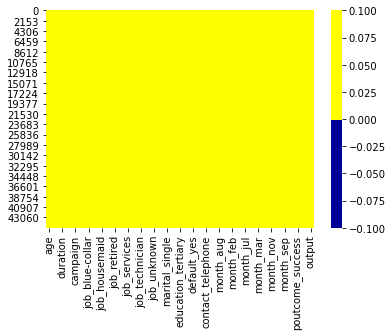

In [18]:
#Missing Value Imputation
import seaborn as sns
cols = bank_data.columns 
colours = ['#000099', '#ffff00'] 
sns.heatmap(bank_data[cols].isnull(),
            cmap=sns.color_palette(colours))

In [19]:
bank_data[bank_data.isnull().any(axis=1)].head()

,age,balance,duration,day,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,output


In [20]:
bank_data.isnull().sum()

age                    0
balance                0
duration               0
day                    0
campaign               0
pdays                  0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
contact_telephone      0
contact_unknown        0
month_aug              0
month_dec              0
month_feb              0
month_jan              0
month_jul              0
month_jun              0
month_mar              0
month_may              0
month_nov              0
month_oct              0
month_sep              0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0


In [21]:
bank_data.shape

(45211, 41)

### checking for multicollinearity problem using VIF factor

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
X = bank_data.iloc[:,:39]
calc_vif(X)

,variables,VIF
0,age,16.352820
1,balance,1.258330
2,duration,2.001607
3,day,5.748521
4,campaign,2.002727
5,pdays,1.719728
6,job_blue-collar,2.856335
7,job_entrepreneur,1.324672
8,job_housemaid,1.287015
9,job_management,3.692072


#### As we can see here, age,day,marital_married,month_may have some collinearity problem so we will remove that columns.

In [24]:
bank_data=bank_data.drop(["age","day","marital_married","month_may"],axis = 1)

In [26]:
bank_data

,balance,duration,campaign,pdays,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,month_jul,month_jun,month_mar,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,output
0,2143,261,1,-1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,29,151,1,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,76,1,-1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1506,92,1,-1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,198,1,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,3,-1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
45207,1729,456,2,-1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
45208,5715,1127,5,184,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
45209,668,508,4,-1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [27]:
X = bank_data.iloc[:,:37]
Y = bank_data.iloc[:,36]

In [28]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
y_pred = classifier.predict(X)

In [30]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [31]:
y_pred_df

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [32]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39922     0]
 [    4  5285]]


In [33]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39922
           1       1.00      1.00      1.00      5289

    accuracy                           1.00     45211
   macro avg       1.00      1.00      1.00     45211
weighted avg       1.00      1.00      1.00     45211



Text(0, 0.5, 'True Positive Rate')

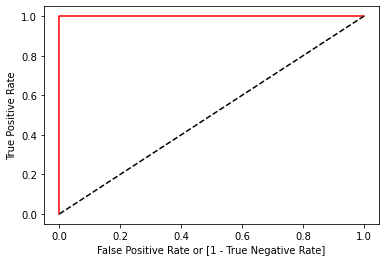

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [35]:
auc

0.9996218566836832

# As AUC value is 99% we can say that our model is very Good for Prediction.